In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

https://drive.google.com/file/d/1C9IcfZK7rtJU23UWNy7kr3czarITcB1s

In [134]:
!gdown --id 1C9IcfZK7rtJU23UWNy7kr3czarITcB1s

Downloading...
From: https://drive.google.com/uc?id=1C9IcfZK7rtJU23UWNy7kr3czarITcB1s
To: /content/cookie_cats.csv
2.80MB [00:00, 13.1MB/s]


In [135]:
df = pd.read_csv('/content/cookie_cats.csv')

**Описание данных** \

*  userid - уникальный идентификатор пользователя  
*  version - в какую группу был помещен пользователь в контрольную (gate_30 на 30 уровне игры) или в тестовую (gate_40 на 40 уровне игры) \
*  sum_gamerounds - количество сыгранных раундов после установки игры \
*  retention_1 - удержание 1ого дня \
*  retenrion_7 - удержание 7ого дня

После установки игрок был случайно помещен в группу gate_30 либо gate_40

In [136]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [137]:
df.shape

(90189, 5)

In [138]:
df['userid'].nunique()

90189

In [139]:
df.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44700,17,52.456264,256.716423,49854
gate_40,45489,16,51.298776,103.294416,2640


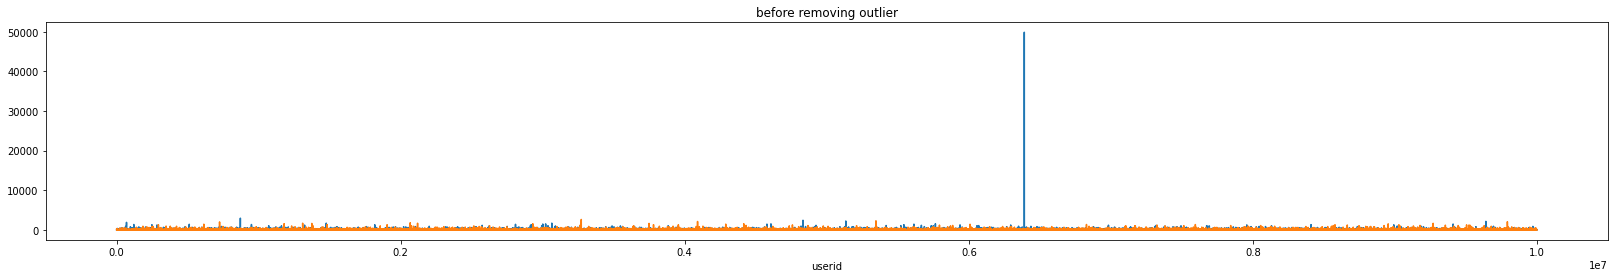

In [140]:
plt.figure(figsize=(28,4))
df[df['version'] == 'gate_30'].set_index('userid')['sum_gamerounds'].plot(title='before removing outlier')
df[df['version'] == 'gate_40'].set_index('userid')['sum_gamerounds'].plot()

Из полученных значений видно, что в данных имеются выбросы

In [141]:
df = df.drop(df.nlargest(1, 'sum_gamerounds').index)

In [142]:
df.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44699,17,51.342111,102.057598,2961
gate_40,45489,16,51.298776,103.294416,2640


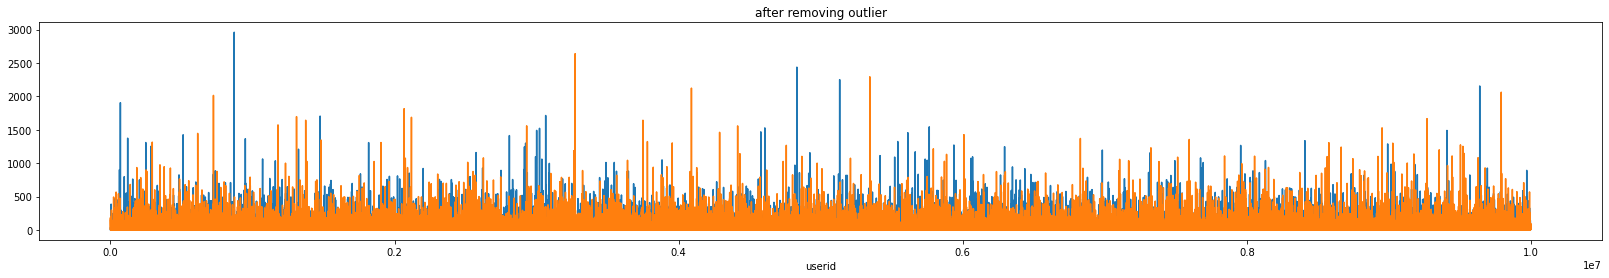

In [143]:
plt.figure(figsize=(28,4))
df[df['version'] == 'gate_30'].set_index('userid')['sum_gamerounds'].plot(title='after removing outlier')
df[df['version'] == 'gate_40'].set_index('userid')['sum_gamerounds'].plot()

In [144]:
df.groupby('sum_gamerounds')['userid'].count()

sum_gamerounds
0       3994
1       5538
2       4606
3       3958
4       3629
        ... 
2251       1
2294       1
2438       1
2640       1
2961       1
Name: userid, Length: 941, dtype: int64

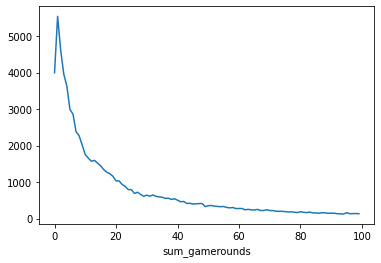

In [145]:
df[df['sum_gamerounds'] < 100].groupby('sum_gamerounds')['userid'].count().plot()

3994 игрока ни разу не заходили в игру после установки

In [146]:
round(df['retention_1'].sum() / df.shape[0] *100, 2)

44.52

In [147]:
round(df['retention_7'].sum() / df.shape[0] *100, 2)

18.61

Удрержание 1ого дня равно 44.52 % \
Удрержание 7ого дня равно 18.61 % \

In [148]:
df.groupby('version')[['retention_1', 'retention_7']].mean()

,retention_1,retention_7
version,,
gate_30,0.448198,0.190183
gate_40,0.442283,0.182000


Удержание 1ого и 7ого дня для каждой группы

In [149]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [150]:
df.groupby(["version", "retention_1"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count  median       mean         std   max
version retention_1                                            
gate_30 False        24665       6  16.359092   36.528426  1072
        True         20034      48  94.411700  135.037697  2961
gate_40 False        25370       6  16.340402   35.925756  1241
        True         20119      49  95.381182  137.887256  2640

In [155]:
df.groupby(["version", "retention_7"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count  median        mean         std   max
version retention_7                                             
A       False        36198      11   25.796508   43.316158   981
        True          8501     105  160.117516  179.358560  2961
B       False        37210      11   25.856356   44.406112  2640
        True          8279     111  165.649837  183.792499  2294

In [152]:
df["NewRetention"] = list(map(lambda x,y: str(x)+"-"+str(y), df.retention_1, df.retention_7))
df.groupby(["version", "NewRetention"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"]).reset_index()

,version,NewRetention,count,median,mean,std,max
0,gate_30,False-False,22840,6,11.819746,21.642643,981
1,gate_30,False-True,1825,43,73.169315,93.222330,1072
2,gate_30,True-False,13358,33,49.694490,58.125396,918
3,gate_30,True-True,6676,127,183.886309,189.626390,2961
4,gate_40,False-False,23597,6,11.913294,20.901020,547
5,gate_40,False-True,1773,47,75.261139,94.478048,1241
6,gate_40,True-False,13613,32,50.025490,60.924587,2640
7,gate_40,True-True,6506,133,190.282355,194.220077,2294


# AB тест:


*   Сплитуем данные на контрольную и тестовую группу
*   Применяем критерий Шапиро-Уилка на нормальность
*   Если критерий параметрический - применяем Тест Левена на гомогенность дисперсий
*   При равенстве дисперсий применяем Т-тест
*   При неравенстве дисперсий применяем Тест Уэлша
*   Если критерий непараметрический - применяем Манна-Уитни



In [153]:
df["version"] = np.where(df.version == "gate_30", "A", "B")
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7,NewRetention
0,116,A,3,False,False,False-False
1,337,A,38,True,False,True-False
2,377,B,165,True,False,True-False
3,483,B,1,False,False,False-False
4,488,B,179,True,True,True-True


In [161]:
def AB_Test(dataframe, group, target):
    
    from scipy.stats import shapiro
    import scipy.stats as stats
    
    # Сплитуем данные
    groupA = dataframe[dataframe[group] == "A"][target]
    groupB = dataframe[dataframe[group] == "B"][target]
    
    # Проверка на нормальность
    ntA = shapiro(groupA)[1] < 0.05
    ntB = shapiro(groupB)[1] < 0.05
    
    if (ntA == False) & (ntB == False): 
        # Проверка на гомогенность дисперсий
        leveneTest = stats.levene(groupA, groupB)[1] < 0.05
        
        if leveneTest == False:
            # Т-тест
            ttest = stats.ttest_ind(groupA, groupB, equal_var=True)[1]
        else:
            # Тест Уэлша
            ttest = stats.ttest_ind(groupA, groupB, equal_var=False)[1]
    else:
        # Манна-Уитни
        ttest = stats.mannwhitneyu(groupA, groupB)[1] 

    temp = pd.DataFrame({
        "AB Hypothesis":[ttest < 0.05], 
        "p-value":[ttest]
    })
    temp["Test Type"] = np.where((ntA == False) & (ntB == False), "Параметрический", "Непараметрический")
    temp["AB Hypothesis"] = np.where(temp["AB Hypothesis"] == False, "Нельзя отклонить нулевую гипотезу", "Отклоняем нулевую гипотезу")
    temp["Comment"] = np.where(temp["AB Hypothesis"] == "Нельзя отклонить нулевую гипотезу", "A/B не отличаются!", "A/B отличаются!")
    
    if (ntA == False) & (ntB == False):
        temp["Homogeneity"] = np.where(leveneTest == False, "Да", "Нет")
        temp = temp[["Test Type", "Homogeneity","AB Hypothesis", "p-value", "Comment"]]
    else:
        temp = temp[["Test Type","AB Hypothesis", "p-value", "Comment"]]
    
    print("# A/B Testing Hypothesis")
    print("H0: A == B")
    print("H1: A != B", "\n")
    
    return temp
    

AB_Test(dataframe=df, group = "version", target = "sum_gamerounds")

# A/B Testing Hypothesis
H0: A == B
H1: A != B 



,Test Type,AB Hypothesis,p-value,Comment
0,Непараметрический,Отклоняем нулевую гипотезу,0.025446,A/B отличаются!
